<a href="https://colab.research.google.com/github/MauroBezerraRego/biblioteca_pandas/blob/main/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

Ler a planilha de vendas:

In [4]:
vendas = pd.read_excel("/content/drive/MyDrive/Análise de dados/DNC/Python/varejo.xlsx")

In [5]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


Informações da base de dados:

In [6]:
vendas.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,80228.000000,80228,79926.000000,80228.000000,80228.000000
mean,251001.882448,2023-03-02 02:53:27.458742528,906.589129,908.619823,13935.464676
min,0.000000,2023-01-02 00:00:00,6.320000,6.320000,1.000000
25%,126835.000000,2023-02-01 00:00:00,144.320000,150.706000,6920.750000
50%,251760.000000,2023-03-02 00:00:00,531.240000,535.120000,13938.000000
75%,375925.000000,2023-04-01 00:00:00,1199.200000,1215.240000,20918.000000
max,723410.000000,2023-04-30 00:00:00,14439.240000,14439.240000,27982.000000
std,144272.920296,NaN,1059.607721,1057.583101,8065.215581


In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


 Alterando os espaços vazios por _

In [8]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ","_")

######Premissas do negócio: Compras com estado em branco, considerar MS

In [9]:
vendas["estado"]=vendas["estado"].fillna("MS")

#####OBS: Poderia ser usado: vendas["estado"].fillna("MS",inplace = True)   ou   vendas["estado"]=vendas["estado"].fillna("MS")

In [10]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


É possível ver que a quantidade de preços é menor que as outras colunas. Há preços em branco. Os preços em branco podem ser substituídos pela média

In [11]:
media_preco = vendas["Preço"].mean()

In [12]:
media_preco

906.5891285439033

Substituindo os valores nulos pela média em preços:

In [13]:
vendas["Preço"]=vendas["Preço"].fillna(media_preco)

In [14]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Acima, podemos ver que todas as colunas possuem a mesma quantidade de itens não nulos

Premissas do negócio: Preço não pode ser maior que preço com frete

In [15]:
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
vendas_correto = vendas.query("Preço < Preço_com_frete").copy()

OBS: O .copy() na linha acima é para fazer uma cópia profunda (copy) do dataframe original. Evitando o aviso SettingwithCopyWarning

In [17]:
vendas_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [18]:
vendas_correto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22047 entries, 2 to 80194
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           22047 non-null  int64         
 1   idcanalvenda       22047 non-null  object        
 2   bandeira           22047 non-null  object        
 3   Data               22047 non-null  datetime64[ns]
 4   Preço              22047 non-null  float64       
 5   Preço_com_frete    22047 non-null  float64       
 6   Nome_Departamento  22047 non-null  object        
 7   estado             22047 non-null  object        
 8   cliente_Log        22047 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.7+ MB


É possível ver que a contagem caiu de 80228 para 22047, após retirar os erro do preço > preço_com_frete

In [19]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [20]:
vendas_correto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22047 entries, 2 to 80194
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           22047 non-null  int64         
 1   idcanalvenda       22047 non-null  object        
 2   bandeira           22047 non-null  object        
 3   Data               22047 non-null  datetime64[ns]
 4   Preço              22047 non-null  float64       
 5   Preço_com_frete    22047 non-null  float64       
 6   Nome_Departamento  22047 non-null  object        
 7   estado             22047 non-null  object        
 8   cliente_Log        22047 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.7+ MB


Descobrindo os departamentos mais vendidos:

In [21]:
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


Média de preço com frete por nome de departamento:

In [22]:
vendas_correto.groupby("Nome_Departamento").Preço_com_frete.mean().sort_values(ascending=False).reset_index()

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.378177
1,Informatica,2159.782620
2,Linha_Industrial,2027.106667
3,Cine_e_Foto,1851.198000
4,Telefones_e_Celulares,1442.185907
5,Eletrodomesticos,1400.662596
6,Esporte_e_Lazer,1123.139383
7,Tablets,1100.233625
8,Games,942.895360
9,Instrumentos_Musicais,834.608000


Para reduzir a quantidade de casas decimais, podemos usar a função round:

In [23]:
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].mean().sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Respondendo a pergunta: Quantidade de vendas por mês:

In [24]:
vendas_correto.groupby("Data").idcompra.nunique()

,idcompra
Data,
2023-01-02,193
2023-01-03,163
2023-01-04,188
2023-01-05,204
2023-01-06,198
...,...
2023-04-26,200
2023-04-27,212
2023-04-28,192


Criando uma nova coluna apenas o mês da data:

In [25]:
vendas_correto['Mes'] = vendas_correto["Data"].dt.month

In [26]:
vendas_correto.head(10)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2
25,422515,Internet,B,2023-03-02,319.20,323.120,Acessorios_e_Inovacoes,SP,11655,3
26,437040,Internet,B,2023-03-20,151.92,155.912,Eletroportateis,PR,19778,3
29,25,Internet,A,2023-04-14,87.92,91.912,Eletroportateis,RS,11987,4
33,94950,Internet,A,2023-01-18,83.92,87.112,Bebes,SP,7076,1
35,156185,Internet,A,2023-02-24,87.92,95.912,Eletroportateis,RJ,15712,2


In [27]:
vendas_mes = vendas_correto.groupby("Mes").idcompra.nunique().sort_values(ascending=False).reset_index()

In [28]:
vendas_mes

,Mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


Lendo a planilha de clientes:

In [29]:
clientes = pd.read_excel("/content/drive/MyDrive/Análise de dados/DNC/Python/cliente_varejo.xlsx")

In [30]:
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [31]:
clientes[["idade","renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [32]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


Alterando renda para float

In [33]:
clientes = clientes.astype({"renda":"float"})

In [34]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


Realizando o join das tabelas vendas_correto e clientes. Será um left join (dados da tabela cliente na tabela vendas_correto.

In [35]:
vendas_cliente = vendas_correto.merge(clientes, how="left", on="cliente_Log")

In [36]:
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


Média de renda para tipo de canal de venda

In [37]:
vendas_cliente.groupby("idcanalvenda").renda.mean()

,renda
idcanalvenda,
APP,8429.448980
Aplicativo,8243.931673
Internet,8211.844949
Mobile,8222.717801


Unindo APP e aplicativo:

In [38]:
vendas_cliente["idcanalvenda"] = vendas_cliente["idcanalvenda"].str.replace("APP", "Aplicativo")

In [39]:
media_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg('mean').sort_values(ascending = False).reset_index(),2)

Média de idade por clientes por bandeira

In [40]:
media_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending = False).reset_index(),2)

In [41]:
media_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


Criando gráficos:

In [42]:
import matplotlib.pyplot as plt

Gráfico da idade média por bandeira



1.   1º comando: Definindo o tamanho da figura
2.   2º comando: Definindo os eixos do gráfico e a cor das barras
3.   3º comando: Editando o título do eixo y
4.   4º comando: Editando o título do gráfico

Text(0.5, 1.0, 'Idade média por Bandeira')

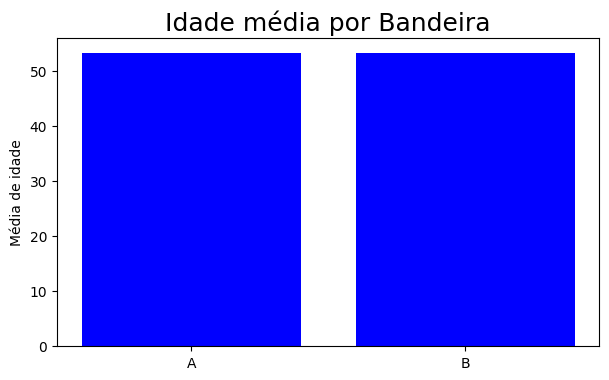

In [43]:
fig = plt.figure(figsize=(7,4))

plt.bar(media_idade_bandeira["bandeira"],media_idade_bandeira["idade"],color="blue")

plt.ylabel("Média de idade")

plt.title("Idade média por Bandeira", loc="center", fontsize='18', color="black")

Gráfico do canal de vendas por renda:

Text(0.5, 1.0, 'Renda média por canal de venda')

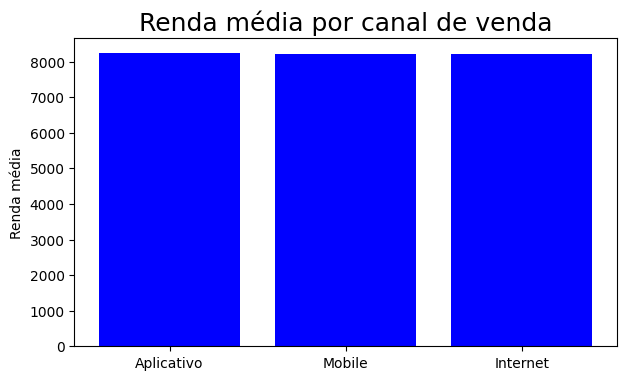

In [44]:
fig = plt.figure(figsize=(7,4))

plt.bar(media_renda["idcanalvenda"],media_renda["renda"],color="blue")

plt.ylabel("Renda média")

plt.title("Renda média por canal de venda", loc="center", fontsize='18', color="black")

Gráfico de barra das vendas por mês:

Text(0.5, 1.0, 'Quantidade de vendas por mês')

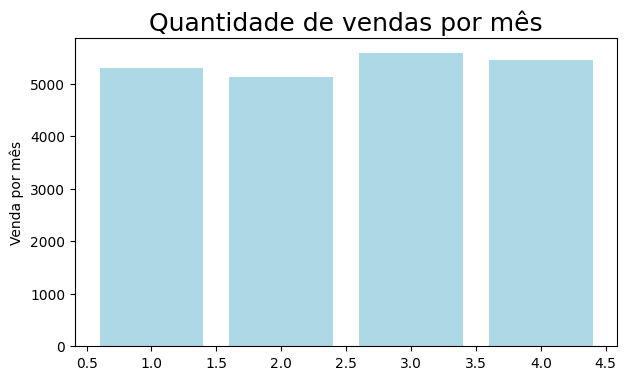

In [45]:
fig = plt.figure(figsize=(7,4))

plt.bar(vendas_mes["Mes"],vendas_mes["idcompra"],color = "lightblue")

plt.ylabel("Venda por mês")

plt.title("Quantidade de vendas por mês", loc="center", fontsize='18', color="black")


Gráfico de linha das vendas por data:

> Adicionar aspas



In [46]:
vendas_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()

In [47]:
vendas_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


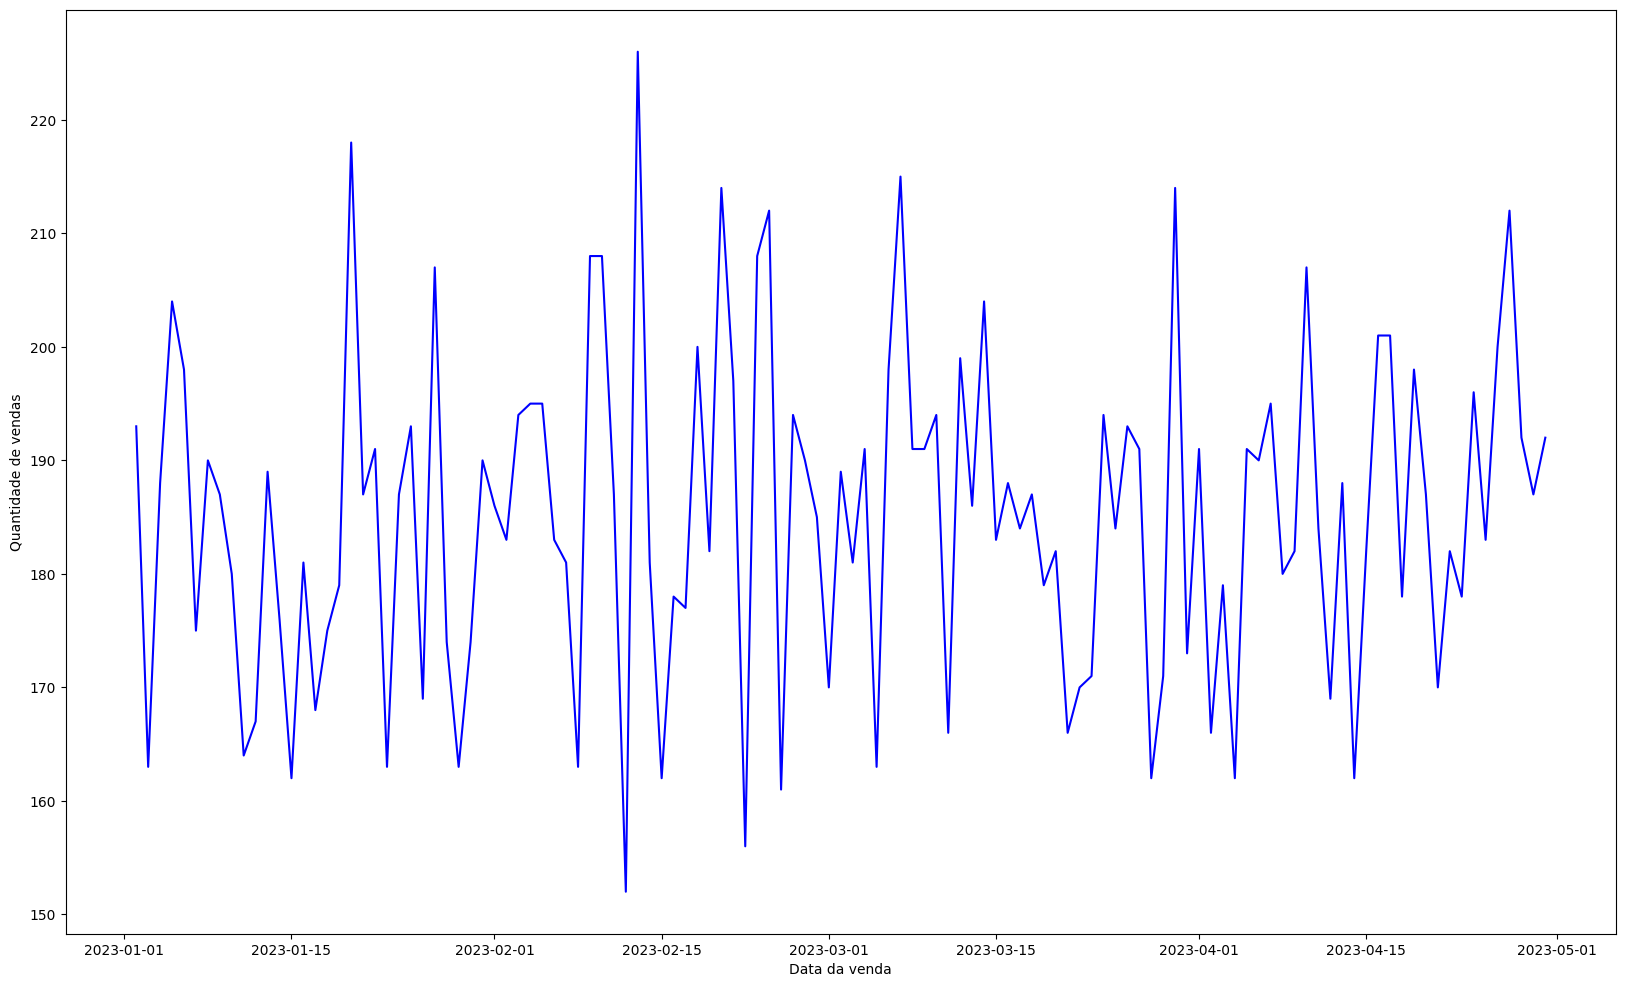

In [48]:
fig = plt.figure(figsize=(20,12))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = vendas_data["Data"]
y = vendas_data["idcompra"]

plt.plot(x,y, color='blue')
plt.show()


Gráfico de média de preço por nome de departamento:

In [49]:
preco_departamento = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].mean().sort_values(ascending=False).reset_index(),2)

In [50]:
preco_departamento

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Média de preço por departamento')

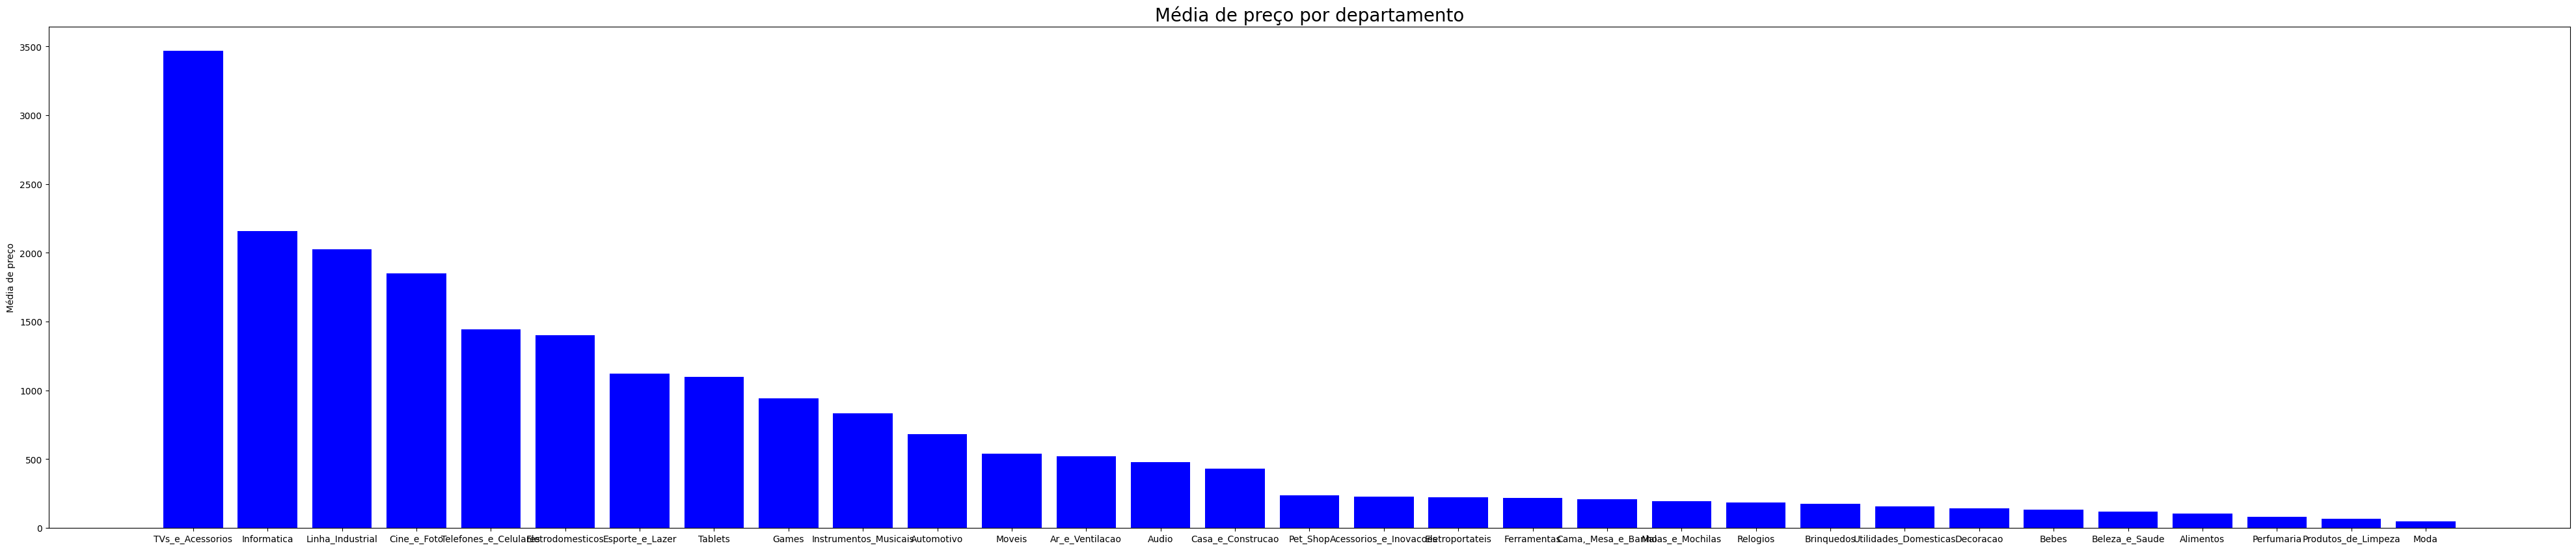

In [51]:
fig = plt.figure(figsize=(50,10))

plt.bar(preco_departamento["Nome_Departamento"],preco_departamento["Preço_com_frete"],color = "blue")

plt.ylabel("Média de preço")

plt.title("Média de preço por departamento", loc="center", fontsize='20', color="black")

Instalando novas bibliotecas de viszualisação

In [52]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [57]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [64]:
px.bar(media_idade_bandeira,x="bandeira", y="idade", text = "idade")

In [66]:
px.line(vendas_data,x="Data",y="idcompra")

In [63]:
px.bar(preco_departamento, x="Nome_Departamento", y="Preço_com_frete", text = "Preço_com_frete")